In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.cross_validation import train_test_split

In [2]:
import os

In [3]:
listfolders=os.listdir('D:/att_faces/')

In [4]:
train=np.zeros((112*92,1))
test=np.zeros((112*92,1))
y_train=np.array([])
y_test=np.array([])
folder='D:/att_faces/'
i=0
for f in os.listdir(folder):
    vals=np.zeros((112*92,1))
    x1=np.array([])
    for f1 in os.listdir(os.path.join(folder,f)):
        k=f
        x1=np.append(x1,int(k.strip('s')))
        ipath=os.path.join(os.path.join(folder,f),f1)
        ipath=ipath.replace('\\','/')
        img=Image.open(ipath)
        iarr=np.array(img)
        iarr=iarr.reshape(112*92,1)
        vals=np.hstack((vals,iarr))
    
    val2=vals[:,1:]
    #print(vals.shape)
    val3=val2.T
    x_train,x_test,ytr,ytest=train_test_split(val3,x1,test_size=0.4)
    x_train=x_train.T
    x_test=x_test.T
    train=np.hstack((train,x_train))
    test=np.hstack((test,x_test))
    ytr.shape=(1,6)
    ytest.shape=(1,4)
    y_train=np.append(y_train,ytr)
    y_test=np.append(y_test,ytest)
train=train[:,1:]
test=test[:,1:]
y_train.shape=(1,240)
y_test.shape=(1,160)
    
    

In [5]:
y_train.shape

(1, 240)

In [6]:
train.shape

(10304, 240)

In [7]:
test.shape

(10304, 160)

In [8]:
mean=np.mean(train,axis=1)

In [9]:
mean.shape

(10304,)

In [10]:
mean.shape=(112*92,1)

In [11]:
delta=train-mean

In [12]:
delta.shape

(10304, 240)

In [13]:
val2=np.matmul(delta.T,delta)

In [14]:
val2.shape

(240, 240)

In [15]:
eigval,eigvec=np.linalg.eig(val2)

In [16]:
eigvec.shape

(240, 240)

In [17]:
eigpair=[(eigval[i],eigvec[:,i]) for i in range(240) ]

In [18]:
len(eigval)

240

In [19]:
eigpair.sort(key=lambda x:x[0],reverse=True)

In [20]:
sortedval=np.array([x[0] for x in eigpair]).reshape(240,1)

In [21]:
sortedval.shape

(240, 1)

In [22]:
sortedvec=np.array([x[1] for x in eigpair])

In [23]:
sortedvec.shape

(240, 240)

In [24]:
test.shape

(10304, 160)

In [166]:
k=240
featurevec=sortedvec[:,0:k]
eigenface=np.matmul(featurevec.T,delta.T)
signature=np.matmul(eigenface,delta)

In [167]:
signature.shape

(240, 240)

In [168]:
mean_per_class=np.zeros((k,1))
for i in range(40):
    mean_per_class=np.hstack((mean_per_class,np.mean(signature[:,i:i+6],axis=1).reshape(k,1)))
    #print(mean_per_class.shape)
mean_per_class=mean_per_class[:,1:]

In [169]:
mean_projected=np.mean(signature,axis=1)

In [170]:
mean_projected.shape=(k,1)

In [171]:
mean_projected[0].shape

(1,)

In [172]:
sb=np.zeros((k,k))
for i in range(40):
    x=(mean_per_class[:,i].reshape(k,1))-mean_projected
    y=x.T
    sb=np.add(sb,np.matmul((x),y))

In [173]:
sw=np.zeros((k,k))
l=0
for i in range(40):
    x=mean_per_class[:,i].reshape(k,1)
    sw=np.add(sw,np.matmul((signature[:,l:l+6]-x),(signature[:,l:l+6]-x).T))
    l=l+6

In [174]:
inv_sw=np.linalg.inv(sw)
J=np.matmul(inv_sw,sb)

In [175]:
eval2,evec2=np.linalg.eig(J)

In [176]:
eval2.shape

(240,)

In [177]:
epair=[(eval2[i],evec2[:,i]) for i in range(k) ]

In [178]:
epair.sort(key=lambda x:x[0],reverse=True)

In [179]:
svec=np.array([x[1] for x in epair])

In [180]:
svec.shape

(240, 240)

In [181]:
m=39

In [182]:
svec2=svec[:,0:m]

In [183]:
ff=np.matmul(svec2.T,signature)

In [184]:
ff.shape

(39, 240)

In [185]:
accr=[]
err=0
for i in range(test.shape[1]):
    test_img=test[:,i]
    test_img.shape=(10304,1)
    test2_img=test_img-mean
    pef=np.matmul(eigenface,test2_img)
    
    pft=np.matmul(svec2.T,pef)
    
    dist=np.linalg.norm((ff-pft),axis=0)
    ind=np.argmin(dist)
    if y_train[0][ind]!=y_test[0][i]:
        err=err+1




In [186]:
err

16

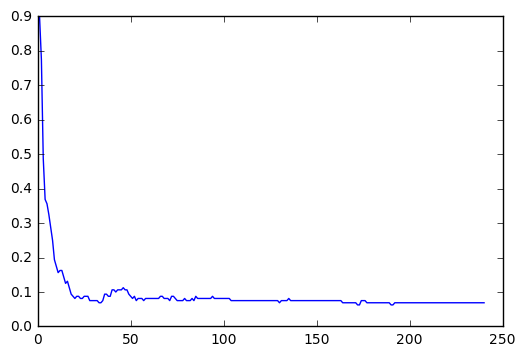

In [26]:
plt.plot(range(1,241),accr)